In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#dropping date and instant columns as they won't be helpful for prediction
df.drop(["dteday","instant"],axis = 1, inplace=True)

In [8]:
# dropping casual and registered columns as they won't be available at the time of making the prediction
df.drop(["casual","registered"],axis=1, inplace=True)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


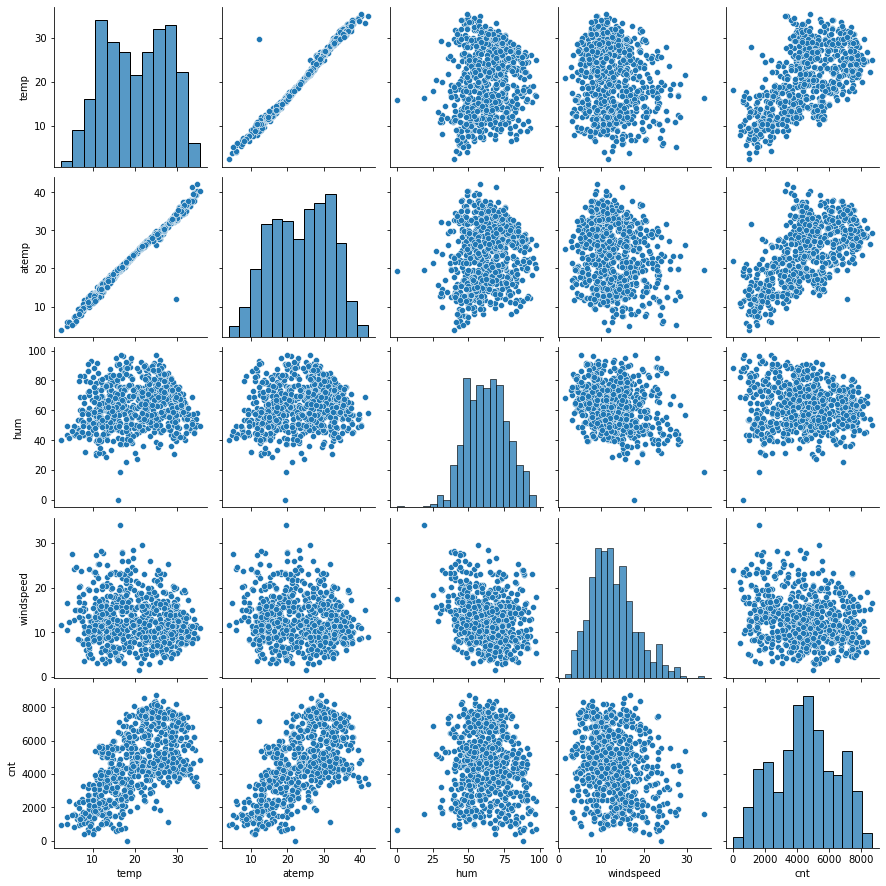

In [10]:
# visualising numeric columns
sns.pairplot(df[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
catcols = ["season","yr","mnth","holiday","weekday","weathersit","workingday"]

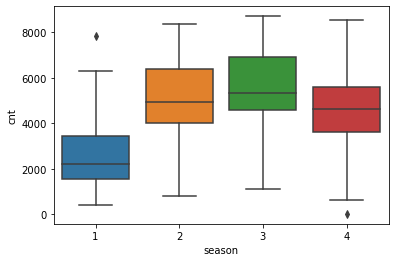

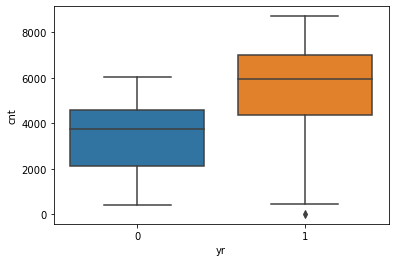

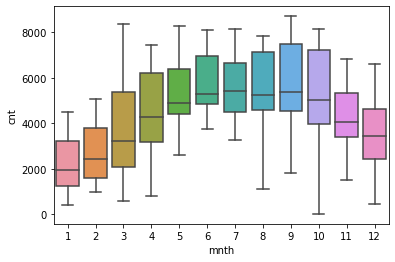

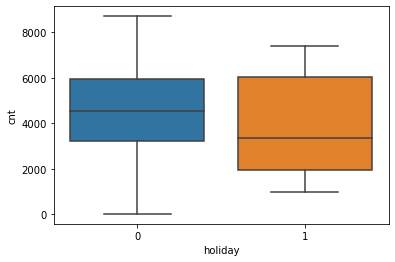

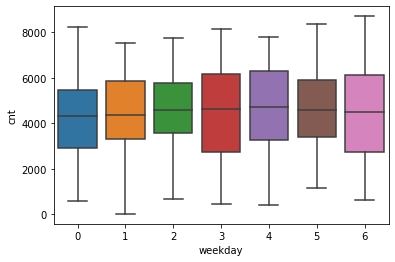

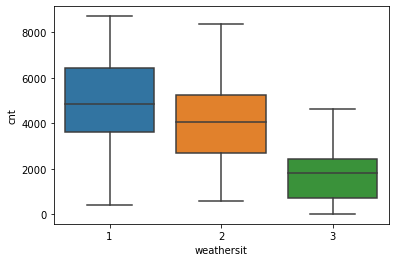

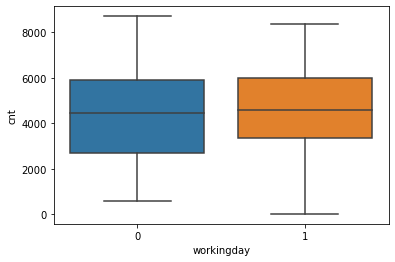

In [13]:
for i in catcols:
    sns.boxplot(data=df, x=i, y="cnt")
    plt.show()

In [14]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [16]:
# binning "mnth" column values into four quaters: q1, q2, q3, q4 and creating a new column 'quater' with the converted values.
di = {(1,2,3):1,(4,5,6):2,(7,8,9):3,(10,11,12):4}
df["quater"] = df.mnth.replace(di)

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quater
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [18]:
# dropping "mnth" column
df.drop("mnth", axis=1, inplace=True)

In [19]:
df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quater
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


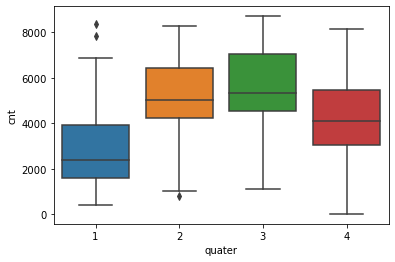

In [20]:
# ploting quater vs cnt
sns.boxplot(data=df, x="quater", y="cnt")
plt.show()

In [21]:
df.describe()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quater
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,2.509589
std,1.110184,0.500343,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,1.117533
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,2.000000
50%,3.000000,0.500000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,3.000000
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,4.000000
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,4.000000


In [22]:
def remove_outliers(df,i):
    q_high = df[i].quantile(0.99)
    q_low = df[i].quantile(0.01)
    df[i] = df[i][(df[i] < q_high) & (df[i] > q_low)]
    

In [23]:
continous_cols = ["temp","atemp","hum","windspeed","cnt"]

In [24]:
for i in continous_cols:
    remove_outliers(df,i)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        714 non-null    float64
 7   atemp       714 non-null    float64
 8   hum         714 non-null    float64
 9   windspeed   714 non-null    float64
 10  cnt         714 non-null    float64
 11  quater      730 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 68.6 KB


In [26]:
# Function for replacing dropped values with median of the respective columns
def fill_median(df,i):
    df[i].fillna(value=df[i].fillna(value=df[i].median()),inplace=True)
    

In [27]:
for i in continous_cols:
    fill_median(df,i)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
 11  quater      730 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 68.6 KB


In [29]:
df.describe()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quater
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,0.028767,2.997260,0.683562,1.394521,20.339684,23.757828,62.832526,12.680340,4510.679452,2.509589
std,1.110184,0.500343,0.167266,2.006161,0.465405,0.544807,7.173115,7.736065,13.182202,4.799799,1845.945333,1.117533
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.150000,7.477400,31.416700,3.565271,705.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,14.051038,17.080975,52.557950,9.136338,3244.500000,2.000000
50%,3.000000,0.500000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,3.000000
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,26.650000,30.240588,72.604150,15.473248,5864.250000,4.000000
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,33.722500,38.068350,92.500000,27.292182,8156.000000,4.000000


# Model building

In [30]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state=100)

In [31]:
df_train.shape

(510, 12)

In [32]:
df_test.shape

(220, 12)

In [33]:
# OneHotEncoding columns 
# i,e weathersit, weekday, quater, season
# setting sparse as false so as to get numpy array as output
# setting drop as first to remove first column from each category
from sklearn.preprocessing import OneHotEncoder
ty_encoder = OneHotEncoder(sparse=False,drop="first")

In [34]:
# Selecting all the categorical columns which are to be encoded 
df_cat = df_train[["quater","season","weekday","weathersit"]]

In [35]:
df_cat.shape

(510, 4)

In [36]:
#fitting and transforming
df_cat1 = ty_encoder.fit_transform(df_cat)
df_cat1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [37]:
# checking categories created
ty_encoder.categories_

[array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([1, 2, 3], dtype=int64)]

In [38]:
# naming categories according to the relevant columns as inputted.
ty_encoder.get_feature_names_out(df_cat.columns)

array(['quater_2', 'quater_3', 'quater_4', 'season_2', 'season_3',
       'season_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype=object)

In [39]:
names = ty_encoder.get_feature_names_out(df_cat.columns)

In [40]:
# creating dataframe out of the encoded numpy array
df_encoded = pd.DataFrame(df_cat1,columns=names)

In [41]:
df_encoded

,quater_2,quater_3,quater_4,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
508,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
df_encoded.shape

(510, 14)

In [43]:
df_train.shape

(510, 12)

In [44]:
# dropping categorical columns which are now encoded
# i,e weathersit, weekday, quater, season
df_train = df_train.drop(df_cat.columns,axis=1)

In [45]:
#resetting index of the dataframe
df_train.reset_index(drop=True,inplace=True)

In [46]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,1,29.246653,33.14480,70.4167,11.083475,7216.0
1,1,0,0,16.980847,20.67460,62.1250,10.792293,4066.0
2,1,0,0,10.489153,11.58500,48.3333,23.500518,1796.0
3,1,0,0,15.443347,18.87520,48.9583,8.708325,4220.0
4,0,0,1,13.803347,16.09770,72.9583,14.707907,1683.0
...,...,...,...,...,...,...,...,...
505,1,0,1,30.852500,35.35440,65.9583,8.666718,7261.0
506,0,0,1,9.091299,12.28585,42.3043,6.305571,1917.0
507,0,0,0,10.591653,12.46855,56.0833,16.292189,2739.0
508,0,0,1,17.647835,20.48675,73.7391,19.348461,2077.0


In [47]:
pd.concat([df_train,df_encoded],axis=1,join="inner")

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,29.246653,33.14480,70.4167,11.083475,7216.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,16.980847,20.67460,62.1250,10.792293,4066.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,10.489153,11.58500,48.3333,23.500518,1796.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,15.443347,18.87520,48.9583,8.708325,4220.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0,1,13.803347,16.09770,72.9583,14.707907,1683.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,0,1,30.852500,35.35440,65.9583,8.666718,7261.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
506,0,0,1,9.091299,12.28585,42.3043,6.305571,1917.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
507,0,0,0,10.591653,12.46855,56.0833,16.292189,2739.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
508,0,0,1,17.647835,20.48675,73.7391,19.348461,2077.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_train = pd.concat([df_train,df_encoded],axis=1,join="inner")

In [49]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,10.489153,11.5850,48.3333,23.500518,1796.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,15.443347,18.8752,48.9583,8.708325,4220.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0,1,13.803347,16.0977,72.9583,14.707907,1683.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
df_train.shape

(510, 22)

In [51]:
continous_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [52]:
# MinMax Scaling
scaler = MinMaxScaler()
df_train[continous_cols] = scaler.fit_transform(df_train[continous_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0.835003,0.849261,0.638472,0.306569,0.878085,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.382838,0.429889,0.502728,0.294111,0.453270,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,0.143529,0.124207,0.276943,0.837787,0.147134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0.326160,0.369376,0.287175,0.204956,0.474039,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0,1,0.265703,0.275969,0.680081,0.461627,0.131895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.499962,0.527111,0.520580,0.378152,0.511164,0.239216,0.252941,...,0.262745,0.247059,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.261506,0.258252,0.214954,0.207379,0.251095,0.427024,0.435124,...,0.440557,0.431725,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.273575,0.303569,0.348182,0.225042,0.338368,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.511308,0.554105,0.517053,0.351140,0.518341,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721962,0.737547,0.679911,0.500412,0.699258,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


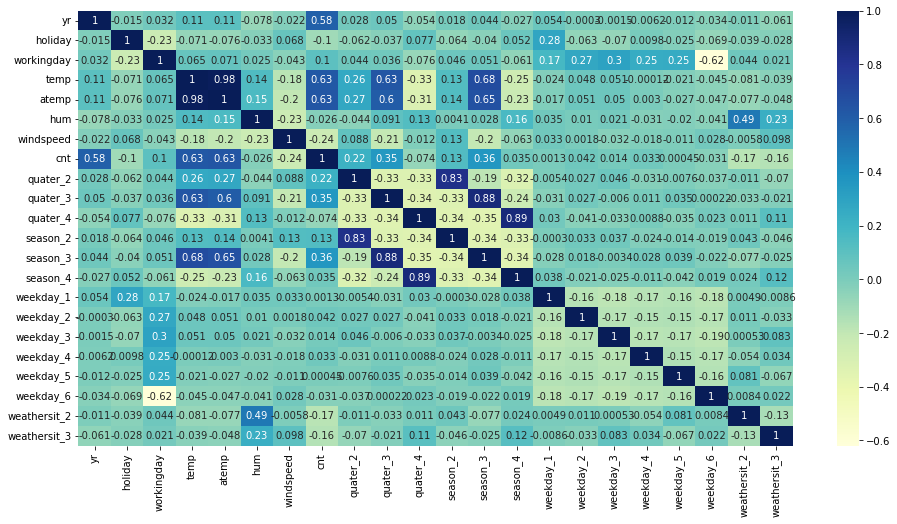

In [54]:
plt.figure(figsize=(16,8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [55]:
# Creating a copy of df_train and df_test for future use (will be used for second model creation)
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [56]:
# splitting df_train into y_train and X_train
y_train = df_train.pop("cnt")
X_train = df_train

In [57]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,quater_2,quater_3,quater_4,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0.835003,0.849261,0.638472,0.306569,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.382838,0.429889,0.502728,0.294111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,0.143529,0.124207,0.276943,0.837787,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0.326160,0.369376,0.287175,0.204956,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0,1,0.265703,0.275969,0.680081,0.461627,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Building a manual model :

In [58]:
# adding constant
X_train_sm = sm.add_constant(X_train)

In [59]:
# Creating a model with all independent variables
#iteration 1
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

In [60]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     90.41
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.40e-150
Time:                        18:47:13   Log-Likelihood:                 376.13
No. Observations:                 510   AIC:                            -710.3
Df Residuals:                     489   BIC:                            -621.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1065      0.028      3.826      0.000       0.052       0.161
yr               0.2581      0.011     24.209      0.000       0.237       0.279
holiday         -0.0428      0.031     -1.380      0.168      -0.104       0.018
workingday       0.0504      0.012      4.038      0.000       0.026       0.075
temp             0.2061      0.115      1.791      0.074      -0.020       0.432
atemp            0.2226      0.112      1.991      0.047       0.003       0.442
hum             -0.0414      0.034     -1.229      0.220      -0.107       0.025
windspeed       -0.1241      0.028     -4.445      0.000      -0.179      -0.069
quater_2         0.0490      0.029      1.692      0.091      -0.008       0.106
quater_3         0.0543      0.036      1.526      0.128      -0.016       0.124
quater_4        -0.0188      0.030     -0.618      0.537      -0.079       0.041
season_2         0.1032      0.028      3.747      0.000       0.049       0.157
season_3         0.0585      0.037      1.576      0.116      -0.014       0.131
season_4         0.2040      0.031      6.592      0.000       0.143       0.265
weekday_1       -0.0083      0.013     -0.639      0.523      -0.034       0.017
weekday_2       -0.0019      0.015     -0.127      0.899      -0.031       0.027
weekday_3       -0.0097      0.014     -0.696      0.487      -0.037       0.018
weekday_4        0.0171      0.014      1.185      0.237      -0.011       0.045
weekday_5        0.0103      0.015      0.694      0.488      -0.019       0.040
weekday_6        0.0498      0.019      2.575      0.010       0.012       0.088
weathersit_2    -0.0745      0.014     -5.345      0.000      -0.102      -0.047
weathersit_3    -0.1954      0.035     -5.615      0.000      -0.264      -0.127
==============================================================================
Omnibus:                       42.120   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.055
Skew:                          -0.043   Prob(JB):                     3.62e-44
Kurtosis:                       6.067   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
17,weekday_5,inf
13,weekday_1,inf
2,workingday,inf
16,weekday_4,inf
15,weekday_3,inf
14,weekday_2,inf
1,holiday,inf
4,atemp,152.78
3,temp,152.68
11,season_3,13.17


In [62]:
# removing varaible with high p and high vif values
# removing weekday_2

In [63]:
X_train_sm.drop("weekday_2", axis=1, inplace=True)
X_train.drop("weekday_2", axis=1, inplace=True)

In [64]:
# training model again
# iteration 2
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     90.41
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.40e-150
Time:                        18:47:13   Log-Likelihood:                 376.13
No. Observations:                 510   AIC:                            -710.3
Df Residuals:                     489   BIC:                            -621.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1065      0.028      3.826      0.000       0.052       0.161
yr               0.2581      0.011     24.209      0.000       0.237       0.279
holiday         -0.0447      0.040     -1.111      0.267      -0.124       0.034
workingday       0.0485      0.020      2.412      0.016       0.009       0.088
temp             0.2061      0.115      1.791      0.074      -0.020       0.432
atemp            0.2226      0.112      1.991      0.047       0.003       0.442
hum             -0.0414      0.034     -1.229      0.220      -0.107       0.025
windspeed       -0.1241      0.028     -4.445      0.000      -0.179      -0.069
quater_2         0.0490      0.029      1.692      0.091      -0.008       0.106
quater_3         0.0543      0.036      1.526      0.128      -0.016       0.124
quater_4        -0.0188      0.030     -0.618      0.537      -0.079       0.041
season_2         0.1032      0.028      3.747      0.000       0.049       0.157
season_3         0.0585      0.037      1.576      0.116      -0.014       0.131
season_4         0.2040      0.031      6.592      0.000       0.143       0.265
weekday_1       -0.0064      0.020     -0.317      0.752      -0.046       0.033
weekday_3       -0.0078      0.020     -0.400      0.690      -0.046       0.031
weekday_4        0.0190      0.020      0.927      0.355      -0.021       0.059
weekday_5        0.0122      0.021      0.590      0.555      -0.028       0.053
weekday_6        0.0498      0.019      2.575      0.010       0.012       0.088
weathersit_2    -0.0745      0.014     -5.345      0.000      -0.102      -0.047
weathersit_3    -0.1954      0.035     -5.615      0.000      -0.264      -0.127
==============================================================================
Omnibus:                       42.120   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.055
Skew:                          -0.043   Prob(JB):                     3.62e-44
Kurtosis:                       6.067   Cond. No.                         55.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.78
3,temp,152.68
11,season_3,13.17
8,quater_3,11.65
5,hum,9.55
2,workingday,8.78
12,season_4,8.63
9,quater_4,8.58
7,quater_2,7.31
10,season_2,6.83


In [66]:
# removing variable with high p value first
# removing weekday_1

In [67]:
X_train_sm.drop("weekday_1", axis=1, inplace=True)
X_train.drop("weekday_1", axis=1, inplace=True)

In [68]:
# training model again
# iteration 3
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     95.34
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.79e-151
Time:                        18:47:14   Log-Likelihood:                 376.07
No. Observations:                 510   AIC:                            -712.1
Df Residuals:                     490   BIC:                            -627.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1067      0.028      3.837      0.000       0.052       0.161
yr               0.2579      0.011     24.245      0.000       0.237       0.279
holiday         -0.0504      0.036     -1.403      0.161      -0.121       0.020
workingday       0.0452      0.017      2.623      0.009       0.011       0.079
temp             0.2071      0.115      1.802      0.072      -0.019       0.433
atemp            0.2219      0.112      1.987      0.047       0.003       0.441
hum             -0.0417      0.034     -1.241      0.215      -0.108       0.024
windspeed       -0.1242      0.028     -4.453      0.000      -0.179      -0.069
quater_2         0.0490      0.029      1.695      0.091      -0.008       0.106
quater_3         0.0546      0.036      1.537      0.125      -0.015       0.124
quater_4        -0.0187      0.030     -0.616      0.538      -0.078       0.041
season_2         0.1031      0.028      3.748      0.000       0.049       0.157
season_3         0.0581      0.037      1.569      0.117      -0.015       0.131
season_4         0.2038      0.031      6.594      0.000       0.143       0.265
weekday_3       -0.0046      0.017     -0.275      0.784      -0.037       0.028
weekday_4        0.0223      0.018      1.272      0.204      -0.012       0.057
weekday_5        0.0155      0.018      0.866      0.387      -0.020       0.051
weekday_6        0.0498      0.019      2.577      0.010       0.012       0.088
weathersit_2    -0.0744      0.014     -5.347      0.000      -0.102      -0.047
weathersit_3    -0.1955      0.035     -5.623      0.000      -0.264      -0.127
==============================================================================
Omnibus:                       42.074   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.912
Skew:                          -0.038   Prob(JB):                     3.89e-44
Kurtosis:                       6.066   Cond. No.                         55.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.74
3,temp,152.58
11,season_3,13.15
8,quater_3,11.64
5,hum,9.54
12,season_4,8.63
9,quater_4,8.58
7,quater_2,7.31
10,season_2,6.83
2,workingday,6.22


In [70]:
# removing variable with high p value first
# removing weekday_3

In [71]:
X_train_sm.drop("weekday_3", axis=1, inplace=True)
X_train.drop("weekday_3", axis=1, inplace=True)

In [72]:
# training model again
# iteration 4
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.92e-152
Time:                        18:47:14   Log-Likelihood:                 376.03
No. Observations:                 510   AIC:                            -714.1
Df Residuals:                     491   BIC:                            -633.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1064      0.028      3.832      0.000       0.052       0.161
yr               0.2580      0.011     24.287      0.000       0.237       0.279
holiday         -0.0508      0.036     -1.417      0.157      -0.121       0.020
workingday       0.0435      0.016      2.705      0.007       0.012       0.075
temp             0.2058      0.115      1.794      0.073      -0.020       0.431
atemp            0.2227      0.112      1.997      0.046       0.004       0.442
hum             -0.0412      0.034     -1.230      0.219      -0.107       0.025
windspeed       -0.1238      0.028     -4.449      0.000      -0.178      -0.069
quater_2         0.0489      0.029      1.692      0.091      -0.008       0.106
quater_3         0.0545      0.035      1.535      0.126      -0.015       0.124
quater_4        -0.0190      0.030     -0.624      0.533      -0.079       0.041
season_2         0.1034      0.027      3.761      0.000       0.049       0.157
season_3         0.0585      0.037      1.584      0.114      -0.014       0.131
season_4         0.2041      0.031      6.618      0.000       0.144       0.265
weekday_4        0.0240      0.016      1.461      0.145      -0.008       0.056
weekday_5        0.0172      0.017      1.021      0.308      -0.016       0.050
weekday_6        0.0498      0.019      2.581      0.010       0.012       0.088
weathersit_2    -0.0746      0.014     -5.362      0.000      -0.102      -0.047
weathersit_3    -0.1964      0.035     -5.678      0.000      -0.264      -0.128
==============================================================================
Omnibus:                       42.194   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.075
Skew:                          -0.038   Prob(JB):                     2.17e-44
Kurtosis:                       6.075   Cond. No.                         55.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.68
3,temp,152.37
11,season_3,13.13
8,quater_3,11.64
5,hum,9.54
12,season_4,8.61
9,quater_4,8.57
7,quater_2,7.31
10,season_2,6.83
2,workingday,5.19


In [74]:
# removing variable with high p value first
# removing quater_4

In [75]:
X_train_sm.drop("quater_4", axis=1, inplace=True)
X_train.drop("quater_4", axis=1, inplace=True)

In [76]:
# training model again
# iteration 5
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.99e-153
Time:                        18:47:14   Log-Likelihood:                 375.83
No. Observations:                 510   AIC:                            -715.7
Df Residuals:                     492   BIC:                            -639.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1053      0.028      3.803      0.000       0.051       0.160
yr               0.2582      0.011     24.328      0.000       0.237       0.279
holiday         -0.0516      0.036     -1.440      0.150      -0.122       0.019
workingday       0.0439      0.016      2.730      0.007       0.012       0.075
temp             0.2079      0.115      1.813      0.070      -0.017       0.433
atemp            0.2218      0.111      1.990      0.047       0.003       0.441
hum             -0.0433      0.033     -1.298      0.195      -0.109       0.022
windspeed       -0.1251      0.028     -4.513      0.000      -0.180      -0.071
quater_2         0.0532      0.028      1.897      0.058      -0.002       0.108
quater_3         0.0647      0.032      2.053      0.041       0.003       0.127
season_2         0.1014      0.027      3.716      0.000       0.048       0.155
season_3         0.0503      0.035      1.458      0.146      -0.018       0.118
season_4         0.1878      0.016     11.582      0.000       0.156       0.220
weekday_4        0.0236      0.016      1.440      0.151      -0.009       0.056
weekday_5        0.0169      0.017      1.003      0.316      -0.016       0.050
weekday_6        0.0497      0.019      2.577      0.010       0.012       0.088
weathersit_2    -0.0740      0.014     -5.337      0.000      -0.101      -0.047
weathersit_3    -0.1954      0.035     -5.660      0.000      -0.263      -0.128
==============================================================================
Omnibus:                       42.319   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.784
Skew:                          -0.030   Prob(JB):                     9.25e-45
Kurtosis:                       6.089   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.59
3,temp,152.19
10,season_3,11.43
5,hum,9.31
8,quater_3,9.12
7,quater_2,6.89
9,season_2,6.73
2,workingday,5.19
6,windspeed,3.50
15,weathersit_2,2.35


In [78]:
# removing variable with high p value first
# removing weekday_5

In [79]:
X_train_sm.drop("weekday_5", axis=1, inplace=True)
X_train.drop("weekday_5", axis=1, inplace=True)

In [80]:
# training model again
# iteration 6
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.21e-153
Time:                        18:47:14   Log-Likelihood:                 375.31
No. Observations:                 510   AIC:                            -716.6
Df Residuals:                     493   BIC:                            -644.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1070      0.028      3.873      0.000       0.053       0.161
yr               0.2579      0.011     24.311      0.000       0.237       0.279
holiday         -0.0498      0.036     -1.393      0.164      -0.120       0.020
workingday       0.0477      0.016      3.051      0.002       0.017       0.078
temp             0.2094      0.115      1.827      0.068      -0.016       0.435
atemp            0.2175      0.111      1.953      0.051      -0.001       0.436
hum             -0.0446      0.033     -1.340      0.181      -0.110       0.021
windspeed       -0.1256      0.028     -4.530      0.000      -0.180      -0.071
quater_2         0.0538      0.028      1.920      0.055      -0.001       0.109
quater_3         0.0653      0.031      2.073      0.039       0.003       0.127
season_2         0.1013      0.027      3.712      0.000       0.048       0.155
season_3         0.0513      0.035      1.488      0.137      -0.016       0.119
season_4         0.1878      0.016     11.587      0.000       0.156       0.220
weekday_4        0.0199      0.016      1.244      0.214      -0.012       0.051
weekday_6        0.0496      0.019      2.571      0.010       0.012       0.088
weathersit_2    -0.0731      0.014     -5.283      0.000      -0.100      -0.046
weathersit_3    -0.1969      0.035     -5.706      0.000      -0.265      -0.129
==============================================================================
Omnibus:                       42.276   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.308
Skew:                          -0.031   Prob(JB):                     1.17e-44
Kurtosis:                       6.085   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.47
3,temp,152.18
10,season_3,11.41
5,hum,9.31
8,quater_3,9.12
7,quater_2,6.88
9,season_2,6.73
2,workingday,4.75
6,windspeed,3.50
11,season_4,2.34


In [82]:
# removing variable with high p value first
# removing weekday_4

In [83]:
X_train_sm.drop("weekday_4", axis=1, inplace=True)
X_train.drop("weekday_4", axis=1, inplace=True)

In [84]:
# training model again
# iteration 7
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.34e-154
Time:                        18:47:14   Log-Likelihood:                 374.51
No. Observations:                 510   AIC:                            -717.0
Df Residuals:                     494   BIC:                            -649.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1079      0.028      3.906      0.000       0.054       0.162
yr               0.2577      0.011     24.284      0.000       0.237       0.279
holiday         -0.0469      0.036     -1.313      0.190      -0.117       0.023
workingday       0.0515      0.015      3.357      0.001       0.021       0.082
temp             0.2074      0.115      1.808      0.071      -0.018       0.433
atemp            0.2194      0.111      1.969      0.049       0.000       0.438
hum             -0.0452      0.033     -1.358      0.175      -0.111       0.020
windspeed       -0.1261      0.028     -4.546      0.000      -0.181      -0.072
quater_2         0.0524      0.028      1.870      0.062      -0.003       0.108
quater_3         0.0638      0.031      2.026      0.043       0.002       0.126
season_2         0.1020      0.027      3.739      0.000       0.048       0.156
season_3         0.0529      0.035      1.534      0.126      -0.015       0.121
season_4         0.1878      0.016     11.580      0.000       0.156       0.220
weekday_6        0.0496      0.019      2.568      0.011       0.012       0.088
weathersit_2    -0.0738      0.014     -5.335      0.000      -0.101      -0.047
weathersit_3    -0.1958      0.035     -5.674      0.000      -0.264      -0.128
==============================================================================
Omnibus:                       42.878   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.234
Skew:                          -0.008   Prob(JB):                     3.68e-46
Kurtosis:                       6.138   Cond. No.                         54.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,atemp,152.42
3,temp,152.14
10,season_3,11.40
5,hum,9.31
8,quater_3,9.10
7,quater_2,6.87
9,season_2,6.73
2,workingday,4.49
6,windspeed,3.50
11,season_4,2.34


In [86]:
# Although atemp has higher vif than temp, but temp has a higher p-value than atemp
# thus removing variable with high p value first
# removing temp

In [87]:
X_train_sm.drop("temp", axis=1, inplace=True)
X_train.drop("temp", axis=1, inplace=True)

In [88]:
# training model again
# iteration 8
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.02e-154
Time:                        18:47:14   Log-Likelihood:                 372.83
No. Observations:                 510   AIC:                            -715.7
Df Residuals:                     495   BIC:                            -652.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1035      0.028      3.752      0.000       0.049       0.158
yr               0.2586      0.011     24.328      0.000       0.238       0.279
holiday         -0.0466      0.036     -1.302      0.193      -0.117       0.024
workingday       0.0504      0.015      3.282      0.001       0.020       0.081
atemp            0.4097      0.037     11.140      0.000       0.337       0.482
hum             -0.0436      0.033     -1.304      0.193      -0.109       0.022
windspeed       -0.1194      0.028     -4.333      0.000      -0.174      -0.065
quater_2         0.0575      0.028      2.057      0.040       0.003       0.112
quater_3         0.0685      0.031      2.179      0.030       0.007       0.130
season_2         0.1026      0.027      3.753      0.000       0.049       0.156
season_3         0.0616      0.034      1.800      0.072      -0.006       0.129
season_4         0.1884      0.016     11.593      0.000       0.157       0.220
weekday_6        0.0487      0.019      2.517      0.012       0.011       0.087
weathersit_2    -0.0745      0.014     -5.377      0.000      -0.102      -0.047
weathersit_3    -0.1940      0.035     -5.612      0.000      -0.262      -0.126
==============================================================================
Omnibus:                       42.915   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.249
Skew:                           0.023   Prob(JB):                     3.65e-46
Kurtosis:                       6.138   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,atemp,15.93
9,season_3,11.19
4,hum,9.31
7,quater_3,9.02
6,quater_2,6.80
8,season_2,6.73
2,workingday,4.45
5,windspeed,3.46
10,season_4,2.34
12,weathersit_2,2.33


In [90]:
# hum and holiday both have high p-value(i,e 0.193)
# Thus removing one with higher vif value also
# removing hum

In [91]:
X_train_sm.drop("hum", axis=1, inplace=True)
X_train.drop("hum", axis=1, inplace=True)

In [92]:
# training model again
# iteration 9
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.98e-155
Time:                        18:47:14   Log-Likelihood:                 371.95
No. Observations:                 510   AIC:                            -715.9
Df Residuals:                     496   BIC:                            -656.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0845      0.023      3.604      0.000       0.038       0.131
yr               0.2601      0.011     24.595      0.000       0.239       0.281
holiday         -0.0464      0.036     -1.296      0.195      -0.117       0.024
workingday       0.0519      0.015      3.390      0.001       0.022       0.082
atemp            0.3990      0.036     11.120      0.000       0.329       0.470
windspeed       -0.1095      0.027     -4.131      0.000      -0.162      -0.057
quater_2         0.0604      0.028      2.164      0.031       0.006       0.115
quater_3         0.0675      0.031      2.144      0.033       0.006       0.129
season_2         0.1006      0.027      3.683      0.000       0.047       0.154
season_3         0.0649      0.034      1.900      0.058      -0.002       0.132
season_4         0.1861      0.016     11.512      0.000       0.154       0.218
weekday_6        0.0511      0.019      2.650      0.008       0.013       0.089
weathersit_2    -0.0851      0.011     -7.569      0.000      -0.107      -0.063
weathersit_3    -0.2115      0.032     -6.629      0.000      -0.274      -0.149
==============================================================================
Omnibus:                       41.915   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.216
Skew:                           0.016   Prob(JB):                     5.51e-44
Kurtosis:                       6.062   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,atemp,12.98
8,season_3,11.17
6,quater_3,9.01
5,quater_2,6.68
7,season_2,6.67
2,workingday,4.19
4,windspeed,3.46
9,season_4,2.23
0,yr,2.00
10,weekday_6,1.71


In [94]:
# Now holday is showing increase in p-value(i,e 0.195)
# Thus removing holiday

In [95]:
X_train_sm.drop("holiday", axis=1, inplace=True)
X_train.drop("holiday", axis=1, inplace=True)

In [96]:
# training model again
# iteration 10
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.64e-156
Time:                        18:47:14   Log-Likelihood:                 371.09
No. Observations:                 510   AIC:                            -716.2
Df Residuals:                     497   BIC:                            -661.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0775      0.023      3.394      0.001       0.033       0.122
yr               0.2602      0.011     24.590      0.000       0.239       0.281
workingday       0.0588      0.014      4.083      0.000       0.030       0.087
atemp            0.4000      0.036     11.143      0.000       0.329       0.471
windspeed       -0.1116      0.026     -4.216      0.000      -0.164      -0.060
quater_2         0.0608      0.028      2.180      0.030       0.006       0.116
quater_3         0.0676      0.031      2.146      0.032       0.006       0.129
season_2         0.1011      0.027      3.697      0.000       0.047       0.155
season_3         0.0649      0.034      1.897      0.058      -0.002       0.132
season_4         0.1859      0.016     11.491      0.000       0.154       0.218
weekday_6        0.0580      0.019      3.133      0.002       0.022       0.094
weathersit_2    -0.0848      0.011     -7.536      0.000      -0.107      -0.063
weathersit_3    -0.2103      0.032     -6.591      0.000      -0.273      -0.148
==============================================================================
Omnibus:                       42.629   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.610
Skew:                           0.011   Prob(JB):                     1.37e-45
Kurtosis:                       6.118   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,atemp,12.87
7,season_3,11.17
5,quater_3,9.01
4,quater_2,6.67
6,season_2,6.67
1,workingday,3.89
3,windspeed,3.29
8,season_4,2.22
0,yr,2.00
9,weekday_6,1.64


In [98]:
# season_3 now has high p-value as well as high vif
# thus removing season_3

In [99]:
X_train_sm.drop("season_3", axis=1, inplace=True)
X_train.drop("season_3", axis=1, inplace=True)

In [100]:
# training model again
# iteration 11
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.66e-156
Time:                        18:47:15   Log-Likelihood:                 369.25
No. Observations:                 510   AIC:                            -714.5
Df Residuals:                     498   BIC:                            -663.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0789      0.023      3.450      0.001       0.034       0.124
yr               0.2594      0.011     24.470      0.000       0.239       0.280
workingday       0.0592      0.014      4.107      0.000       0.031       0.088
atemp            0.4218      0.034     12.367      0.000       0.355       0.489
windspeed       -0.1130      0.027     -4.258      0.000      -0.165      -0.061
quater_2         0.0796      0.026      3.042      0.002       0.028       0.131
quater_3         0.1108      0.022      5.085      0.000       0.068       0.154
season_2         0.0716      0.023      3.175      0.002       0.027       0.116
season_4         0.1728      0.015     11.784      0.000       0.144       0.202
weekday_6        0.0578      0.019      3.114      0.002       0.021       0.094
weathersit_2    -0.0855      0.011     -7.580      0.000      -0.108      -0.063
weathersit_3    -0.2070      0.032     -6.481      0.000      -0.270      -0.144
==============================================================================
Omnibus:                       41.479   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.033
Skew:                          -0.007   Prob(JB):                     4.46e-43
Kurtosis:                       6.029   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,atemp,11.06
4,quater_2,5.84
6,season_2,4.52
5,quater_3,4.27
1,workingday,3.88
3,windspeed,3.29
0,yr,2.00
7,season_4,1.81
8,weekday_6,1.64
9,weathersit_2,1.54


<AxesSubplot:ylabel='Density'>

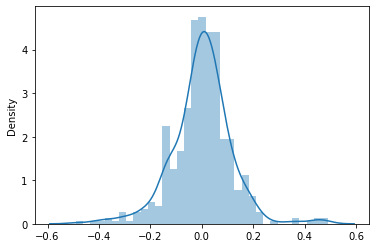

In [102]:
# Soft checking the model
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [103]:
# HANDLING TEST SET

In [104]:
# Making the same encoding changes made on df_train, in df_test
# We are not going to fit on test set, just going to use transform from the already fitted encoder
df_test_cat = df_test[["quater","season","weekday","weathersit"]]
df_test_cat1 = ty_encoder.transform(df_test_cat)
names_test = ty_encoder.get_feature_names_out(df_test_cat.columns)
df_test_encoded = pd.DataFrame(df_test_cat1,columns=names_test)
df_test = df_test.drop(df_test_cat.columns,axis=1)
df_test.reset_index(drop=True,inplace=True)
df_test = pd.concat([df_test,df_test_encoded],axis=1,join="inner")


In [105]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,32.082500,36.04875,59.2083,7.625404,6211.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,19.270000,22.85230,81.2917,13.250121,2659.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,1,31.433347,34.24915,42.4167,13.417286,4780.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,29.315000,32.19710,62.6250,19.583229,4968.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
# For MinMax scaling, just going to use transform inplace of fit_transform
df_test[continous_cols] = scaler.transform(df_test[continous_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,1,0,0.855156,0.853500,0.530014,0.065950,0.719892,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,0.939543,0.946920,0.454979,0.158627,0.742549,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0.467225,0.503125,0.816508,0.399261,0.263520,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,1,0.915613,0.886400,0.180082,0.406412,0.549562,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.837522,0.817390,0.510914,0.670200,0.574916,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
df_test.describe()
# we can see that min and the max values are not exactly 0 and 1 for continous variables, this is because we have fitted the 
# scaler model on train set and only used tranform for test set.

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.522178,0.548569,0.499779,0.367310,0.518055,0.272727,0.250,...,0.245455,0.236364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.271049,0.264525,0.217569,0.200801,0.244393,0.446377,0.434,...,0.431338,0.425817,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,-0.016429,-0.013931,0.031614,-0.015071,0.012138,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.281146,0.316307,0.342087,0.219216,0.360587,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.511308,0.554105,0.496145,0.352030,0.518341,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751246,0.762730,0.658224,0.483940,0.674882,1.000000,0.250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.993702,1.014839,0.995907,0.905516,1.004855,1.000000,1.000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
# Splitting df_test into y_test and X_test
y_test = df_test.pop("cnt")
X_test = df_test

In [109]:
# adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1.0,0,1,0,0.855156,0.853500,0.530014,0.065950,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1,0,1,0.939543,0.946920,0.454979,0.158627,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0,1,0.467225,0.503125,0.816508,0.399261,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0,0,1,0.915613,0.886400,0.180082,0.406412,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,0,1,0.837522,0.817390,0.510914,0.670200,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [110]:
# list of columns we have kept during our iterations of model building, using X_train_sm as it includes the header "const"
remaining_columns = X_train_sm.columns

In [111]:
# Keeping only those columns which were remaining in train set in the last model build (i,e iteration 11)
X_test_sm = X_test_sm[remaining_columns]
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,quater_2,quater_3,season_2,season_4,weekday_6,weathersit_2,weathersit_3
0,1.0,0,0,0.853500,0.065950,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1,1,0.946920,0.158627,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0,1,0.503125,0.399261,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0,1,0.886400,0.406412,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0,1,0.817390,0.670200,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [112]:
# MAKING PREDICTION ON TEST SET
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

0      0.456796
1      0.930250
2      0.392588
3      0.576922
4      0.558446
         ...   
215    0.753605
216    0.481014
217    0.795228
218    0.236304
219    0.745164
Length: 220, dtype: float64

<AxesSubplot:ylabel='Density'>

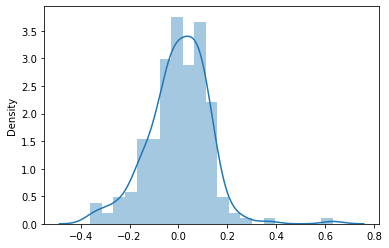

In [113]:
# RESIDUAL ANALYSIS
res = y_test - y_test_pred
sns.distplot(res)

In [114]:
# Evaluating the model on test set

print("R-square =",r2_score(y_true=y_test, y_pred=y_test_pred))
print("Mean Squared Error =",mean_squared_error(y_test,y_test_pred))

R-square = 0.7426404217472784
Mean Squared Error = 0.01530172157161077


In [115]:
# Our final model's r2 was 0.781 and now on test set we have got 0.742 which is quite good 
# Also the residual curve shows normalised distribution, which is a good indicator for the model
# Also mean squared error value is very low, which indeed is a good indicator for the model

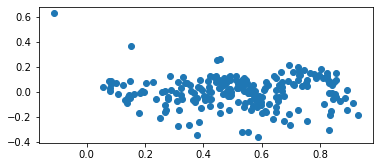

In [116]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_test_pred, res)
plt.show()

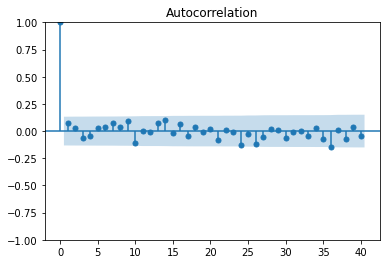

In [117]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

## Building an automatic model:

In [118]:
# we will be using copies of train and test set which we have previsouly saved after the train set had undergone OneHotEncoding

In [119]:
df_train_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0.835003,0.849261,0.638472,0.306569,0.878085,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.382838,0.429889,0.502728,0.294111,0.453270,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,0,0.143529,0.124207,0.276943,0.837787,0.147134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0.326160,0.369376,0.287175,0.204956,0.474039,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0,1,0.265703,0.275969,0.680081,0.461627,0.131895,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [120]:
df_test_copy.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quater
184,3,0,1,1,0,2,29.793347,33.27085,63.7917,5.459106,6043.0,3
535,2,1,0,3,1,1,32.082500,36.04875,59.2083,7.625404,6211.0,2
299,4,0,0,4,1,2,19.270000,22.85230,81.2917,13.250121,2659.0,4
221,3,0,0,3,1,1,31.433347,34.24915,42.4167,13.417286,4780.0,3
152,2,0,0,4,1,1,29.315000,32.19710,62.6250,19.583229,4968.0,2


In [121]:
# splitting df_train_copy into two: y_train and X_train
y_train = df_train_copy.pop("cnt")
X_train = df_train_copy

In [122]:
# Instantiating
lm = LinearRegression()

# Instantiating and setting the RFE such as to select 10 features
rfe1 = RFE(lm,n_features_to_select = 10)

# Fitting the model on train set
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [123]:
# Printing the boolean results
print(rfe1.support_)

[ True False  True  True  True False  True False False False  True  True
  True False False False False False False  True  True]


In [124]:
# Checking the rankings of the remaining features
print(rfe1.ranking_)

[ 1  5  1  1  1  6  1  4  3  8  1  1  1 11 12 10  7  9  2  1  1]


In [125]:
# name of features selected by RFE
selected = X_train.columns[rfe1.support_]

In [126]:
# subsetting trainning data for 10 selected features
X_train_rfe1 = X_train[selected]

In [127]:
# adding constant
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,workingday,temp,atemp,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1.0,1,1,0.835003,0.849261,0.306569,0.0,1.0,0.0,0.0,0.0
1,1.0,1,0,0.382838,0.429889,0.294111,0.0,0.0,0.0,1.0,0.0
2,1.0,1,0,0.143529,0.124207,0.837787,0.0,0.0,0.0,0.0,0.0
3,1.0,1,0,0.326160,0.369376,0.204956,1.0,0.0,0.0,1.0,0.0
4,1.0,0,1,0.265703,0.275969,0.461627,1.0,0.0,0.0,1.0,0.0


In [128]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          8.70e-156
Time:                        18:47:16   Log-Likelihood:                 364.87
No. Observations:                 510   AIC:                            -707.7
Df Residuals:                     499   BIC:                            -661.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1030      0.021      4.871   

In [129]:
# The automatic model has choosen to keep both temp and atemp
# Also, it is giving very sightly lesser R squared and Adjusted R squared values as compared to manual model

In [130]:
a = X_train_rfe1.iloc[:,1:]
vif = pd.DataFrame()
vif["Features"] = a.columns
vif["VIF"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,149.06
3,atemp,145.83
6,season_3,5.71
5,season_2,3.15
4,windspeed,3.02
1,workingday,2.78
7,season_4,2.18
0,yr,1.99
8,weathersit_2,1.51
9,weathersit_3,1.08


<AxesSubplot:ylabel='Density'>

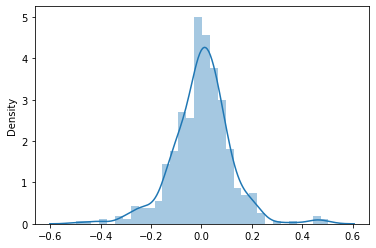

In [131]:
# Soft checking
y_train_pred = lm1.predict(X_train_rfe1)
res = y_train - y_train_pred
sns.distplot(res)

In [132]:
# Handling test set
# Same step as done in manual method
df_test_cat = df_test_copy[["quater","season","weekday","weathersit"]]
df_test_cat1 = ty_encoder.transform(df_test_cat)
names_test = ty_encoder.get_feature_names_out(df_test_cat.columns)
df_test_encoded = pd.DataFrame(df_test_cat1,columns=names_test)
df_test_copy = df_test_copy.drop(df_test_cat.columns,axis=1)
df_test_copy.reset_index(drop=True,inplace=True)
df_test_copy = pd.concat([df_test_copy,df_test_encoded],axis=1,join="inner")


In [133]:
df_test_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,32.082500,36.04875,59.2083,7.625404,6211.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,19.270000,22.85230,81.2917,13.250121,2659.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,1,31.433347,34.24915,42.4167,13.417286,4780.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,29.315000,32.19710,62.6250,19.583229,4968.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [134]:
# MinMax Scaling
# Same step as done for manual method
df_test_copy[continous_cols] = scaler.transform(df_test_copy[continous_cols])
df_test_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,quater_2,quater_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,1,0,0.855156,0.853500,0.530014,0.065950,0.719892,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,0.939543,0.946920,0.454979,0.158627,0.742549,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0.467225,0.503125,0.816508,0.399261,0.263520,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,1,0.915613,0.886400,0.180082,0.406412,0.549562,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.837522,0.817390,0.510914,0.670200,0.574916,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [135]:
# Splitting df_test_copy into two: y_test and X_test
y_test = df_test_copy.pop("cnt")
X_test = df_test_copy

In [136]:
# Keeping the columns selected by RFE
X_test_rfe1 = X_test[selected]


In [137]:
# Adding constant
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.head()

,const,yr,workingday,temp,atemp,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3
0,1.0,0,0,0.855156,0.853500,0.065950,0.0,1.0,0.0,1.0,0.0
1,1.0,1,1,0.939543,0.946920,0.158627,1.0,0.0,0.0,0.0,0.0
2,1.0,0,1,0.467225,0.503125,0.399261,0.0,0.0,1.0,1.0,0.0
3,1.0,0,1,0.915613,0.886400,0.406412,0.0,1.0,0.0,0.0,0.0
4,1.0,0,1,0.837522,0.817390,0.670200,1.0,0.0,0.0,0.0,0.0


In [138]:
# MAKING PREDICTION:
y_test_pred = lm1.predict(X_test_rfe1)
y_test_pred

0      0.495695
1      0.931953
2      0.403970
3      0.588951
4      0.560916
         ...   
215    0.759666
216    0.495312
217    0.823078
218    0.227214
219    0.751339
Length: 220, dtype: float64

<AxesSubplot:ylabel='Density'>

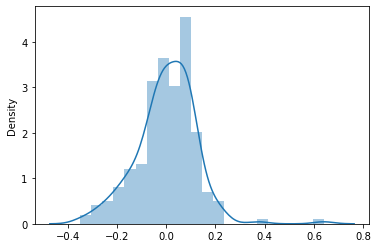

In [139]:
# Residual analysis
res = y_test - y_test_pred
sns.distplot(res)

In [140]:
# Evaluating the model on test set

print("R-square =",r2_score(y_true=y_test, y_pred=y_test_pred))
print("Mean Squared Error =",mean_squared_error(y_test,y_test_pred))

R-square = 0.7549165214330491
Mean Squared Error = 0.014571826610434928


In [141]:
# Model's r2 was 0.778 and now on test set we have got 0.754 which is quite good 
# Also the residual curve shows normalised distribution, which is a good indicator for the model
# Also mean squared error value is very low, which is a good indicator too

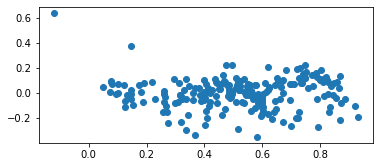

In [142]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_test_pred, res)
plt.show()

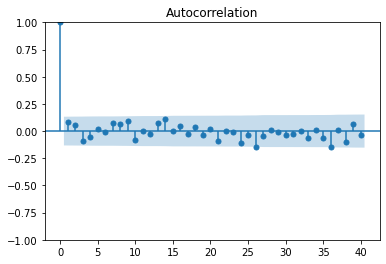

In [143]:
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()